In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorama

import seaborn as sn
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression


In [12]:
df = pd.read_csv(r"C:\Users\Mesut\Projekt TechLabs\Projekt mit Clean Daten\diabetes_clear_datas.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [13]:
df.shape

(253680, 22)

In [14]:
index_df_loc = df.loc[0: , ['Diabetes_012', 'Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
index_df_loc

,Diabetes_012,Smoker,PhysActivity,Age,BMI,Stroke,HeartDiseaseorAttack
0,0.0,1.0,0.0,9.0,40.0,0.0,0.0
1,0.0,1.0,1.0,7.0,25.0,0.0,0.0
2,0.0,0.0,0.0,9.0,28.0,0.0,0.0
3,0.0,0.0,1.0,11.0,27.0,0.0,0.0
4,0.0,0.0,1.0,11.0,24.0,0.0,0.0
...,...,...,...,...,...,...,...
253675,0.0,0.0,0.0,5.0,45.0,0.0,0.0
253676,2.0,0.0,0.0,11.0,18.0,0.0,0.0
253677,0.0,0.0,1.0,2.0,28.0,0.0,0.0
253678,0.0,0.0,0.0,7.0,23.0,0.0,0.0


In [15]:
index_df = df['Diabetes_012'].map({0.0:'Non_Diabetes', 1.0:'Pre-Diabetes', 2.0:'Diabetes_2'})
#df['Diabetes_012'] = df['Diabetes_012'].str.replace('1.0', '2.0')     
lookup_diabetes_012 = dict(zip(df.Diabetes_012.unique(), index_df.unique()))   
lookup_diabetes_012

{0.0: 'Non_Diabetes', 2.0: 'Diabetes_2', 1.0: 'Pre-Diabetes'}

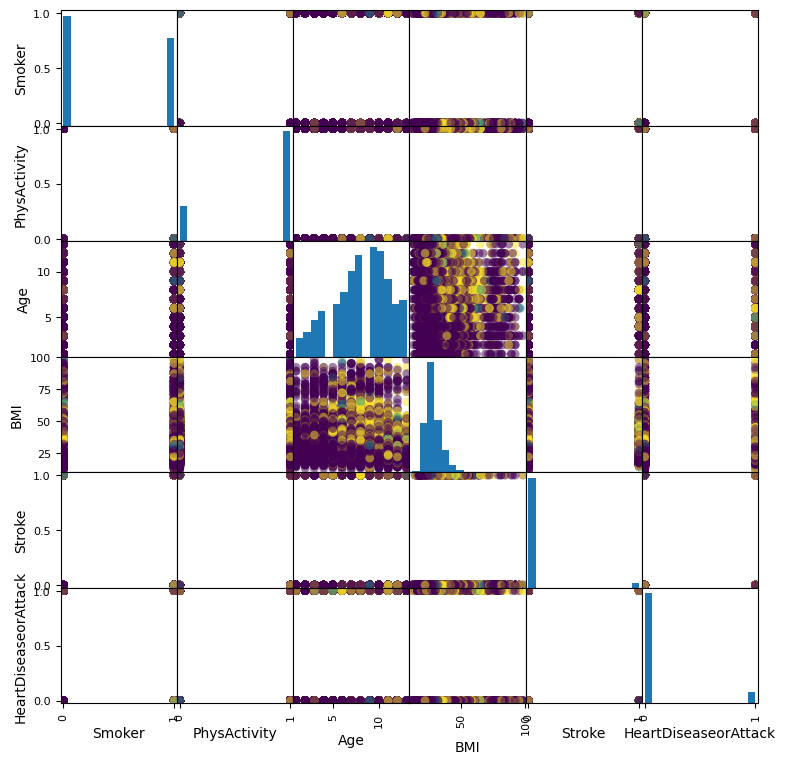

In [16]:
# plotting a scatter matrix


X = df[['Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
y = df['Diabetes_012']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap='viridis')

plt.show()
#plt.colorbar(figure)

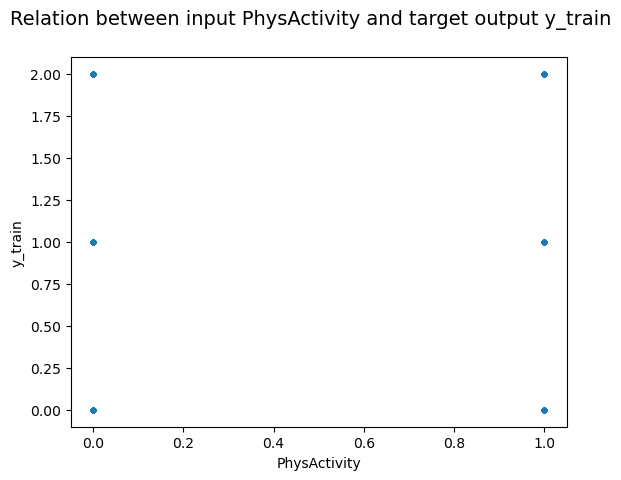

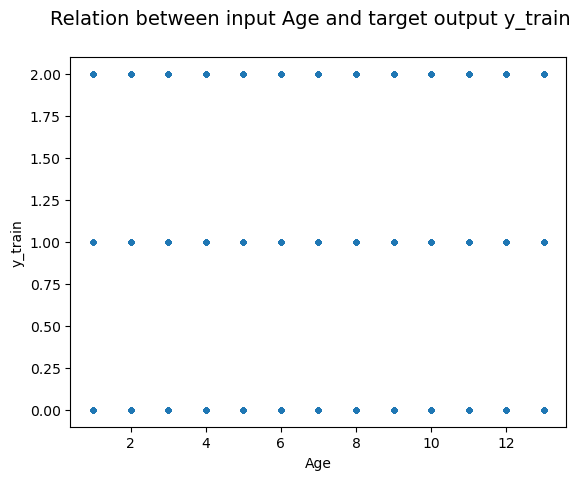

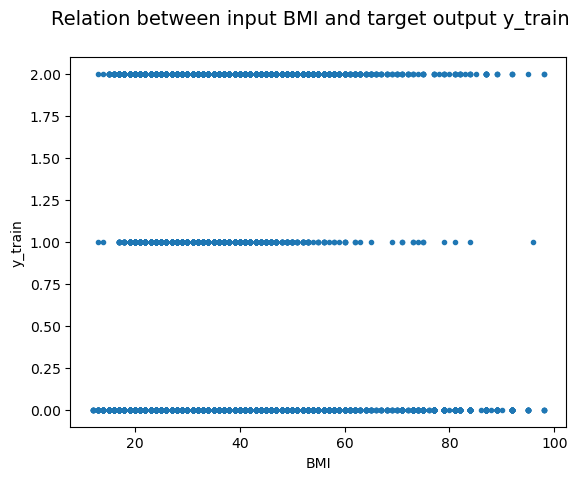

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


x = X_train['PhysActivity']
y = y_train
plt.suptitle('Relation between input PhysActivity and target output y_train', fontsize=14)
plt.xlabel('PhysActivity', fontsize= 10)
plt.ylabel('y_train', fontsize=10)
plt.scatter(x, y, marker = '.')
plt.show()

x = X_train['Age']
y = y_train
plt.suptitle('Relation between input Age and target output y_train', fontsize=14)
plt.xlabel('Age', fontsize= 10)
plt.ylabel('y_train', fontsize=10)
plt.scatter(x, y, marker = '.')
plt.show()

x = X_train['BMI']
y = y_train
plt.suptitle('Relation between input BMI and target output y_train', fontsize=14)
plt.xlabel('BMI', fontsize= 10)
plt.ylabel('y_train', fontsize=10)
plt.scatter(x, y, marker = '.')
plt.show()


# knn

In [18]:
# For this example, we use the Smoker, PhysicalActivity, and Age of each Diabetes instance
X = df[['Smoker', 'PhysActivity', 'BMI']]
y = df['Diabetes_012']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
#y_train = scaler.transform(y_train)
#y_test = scaler.transform(y_test)

In [20]:
print(X_train.std(axis=0))
print(X_test.std(axis=0))

[1. 1. 1.]
[0.99933447 0.99961922 0.99521547]


In [21]:
knn = KNeighborsClassifier(n_neighbors=5)

In [22]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
knn.score(X_test, y_test)

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8153106275622832

In [24]:
# first example: a PhysicalActivity=1 ,Age=6, BMI=65
diabetes_prediction = knn.predict([[1, 6, 65]])
lookup_diabetes_012[diabetes_prediction[0]]

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


'Diabetes_2'

In [25]:
y_pred =  knn.predict(X_test)
y_pred[:10]

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, multilabel_confusion_matrix

print(confusion_matrix(y_test, y_pred))
print()
print(multilabel_confusion_matrix(y_test, y_pred))

[[50704     1  2803]
 [ 1039     0   120]
 [ 7747     3  1003]]

[[[ 1126  8786]
  [ 2804 50704]]

 [[62257     4]
  [ 1159     0]]

 [[51744  2923]
  [ 7750  1003]]]


In [28]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)


array([0., 1., 2.])

In [29]:
def plot(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,50704,1,2803
Actual 1.0,1039,0,120
Actual 2.0,7747,3,1003


In [30]:
import seaborn as sns

<AxesSubplot:>

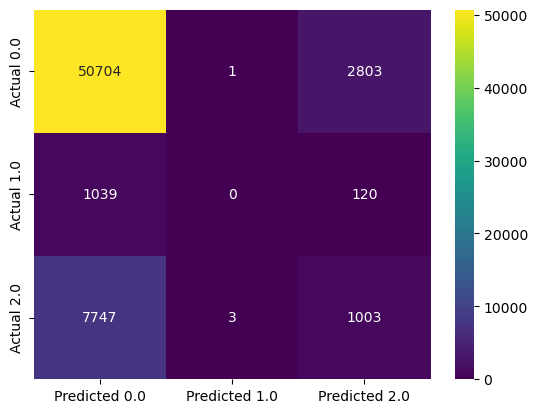

In [31]:
def plot2(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return sns.heatmap(table, annot=True, fmt='d' , cmap='viridis')

plot2(y_test, y_pred)

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     53508
         1.0       0.00      0.00      0.00      1159
         2.0       0.26      0.11      0.16      8753

    accuracy                           0.82     63420
   macro avg       0.37      0.35      0.35     63420
weighted avg       0.75      0.82      0.78     63420



In [33]:
tp0 = 51658
tn0 = 894
fp0 = 9241
fn0 = 1627

recall_0 = tp0/(tp0+fn0)
precision_0 = tp0/(tp0+fp0)
f1_score_0 =  (recall_0 * precision_0 / (recall_0 + precision_0) * 2)

print(f"Recall_no_diabetes : {recall_0} ")
print(f"Precision_no_diabetes : {precision_0} ")
print(f"F1_score_no_diabetes : {f1_score_0} ")

print()

tp1= 0
tn1 = 62287
fp1 = 0
fn1 = 1133

recall_1 = 0 
precision_1 = 0
f1_score_1 =  0

print(f"Recall_diabetes_1 : {recall_1} ")
print(f"Precision_diabetes_1 : {precision_1} ")
print(f"F1_score_diabetes_1 : {f1_score_1} ")

print()

tp2 = 832
tn2 = 52719
fp2 = 1699
fn2 = 8180

recall_2 = tp2/(tp2+fn2)
precision_2 = tp2/(tp2+fp2)
f1_score_2 =  (recall_2 * precision_2 / (recall_2 + precision_2) * 2)

print(f"Recall_diabetes_2 : {recall_2} ")
print(f"Precision_diabetes_2 : {precision_2} ")
print(f"F1_score_diabetes_2 : {f1_score_2} ")

Recall_no_diabetes : 0.9694660786337619 
Precision_no_diabetes : 0.8482569500320203 
F1_score_no_diabetes : 0.9048202900581518 

Recall_diabetes_1 : 0 
Precision_diabetes_1 : 0 
F1_score_diabetes_1 : 0 

Recall_diabetes_2 : 0.0923213493120284 
Precision_diabetes_2 : 0.32872382457526667 
F1_score_diabetes_2 : 0.14415663172485488 


In [34]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8153106275622832

In [35]:
precision = metrics.precision_score(y_test, y_pred, average=None)
precision

array([0.85231131, 0.        , 0.25547631])

In [36]:
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([0.94759662, 0.        , 0.11458928])

In [37]:
recall_specificity = metrics.recall_score(y_test, y_pred, average=None)
recall_specificity

array([0.94759662, 0.        , 0.11458928])

In [38]:
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.89743181, 0.        , 0.15821437])

In [39]:
analyse = [{'Accuracy :' : accuracy, 
       'Precision :' : precision, 
       'Recall-Sensitivity :' : recall_sensitivity, 
       'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}]
list(analyse)


[{'Accuracy :': 0.8153106275622832,
  'Precision :': array([0.85231131, 0.        , 0.25547631]),
  'Recall-Sensitivity :': array([0.94759662, 0.        , 0.11458928]),
  'Recall-Specificity : ': array([0.94759662, 0.        , 0.11458928]),
  'F1-Score : ': array([0.89743181, 0.        , 0.15821437])}]

# LINEAR REGRESSION !

In [40]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [41]:
# For this example, we use the PhysicalActivity, Age and BMI of each Diabetes instance
X = df[['PhysActivity', 'Age', 'BMI']]
y = df['Diabetes_012']

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [42]:
linreg = LinearRegression().fit(X_train, y_train)

print(linreg.score(X_test, y_test))

# first example: a PhysicalActivity=1 ,Age=6, BMI=35
diabetes_prediction = linreg.predict([[1, 6, 65]])
print(diabetes_prediction)

diabetes_prediction_rounded = [np.round(x) for x in diabetes_prediction]
print(diabetes_prediction_rounded)

    
if diabetes_prediction_rounded == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction_rounded[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction_rounded[0]]} with your lifestyle ! Please contact a physician for more information !')


0.09545606603212076
[1.02981564]
[1.0]
Unfortunately you have or you will have Pre-Diabetes with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
y_pred =  linreg.predict(X_test)
y_pred = np.round(y_pred, 0) #[np.round(x) for x in y_pred]
y_pred[:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])

In [44]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [45]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report
import seaborn as sns
unique_labels(y_test)

def plot1(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot1(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,47660,5566,59
Actual 1.0,826,307,0
Actual 2.0,5815,3179,8


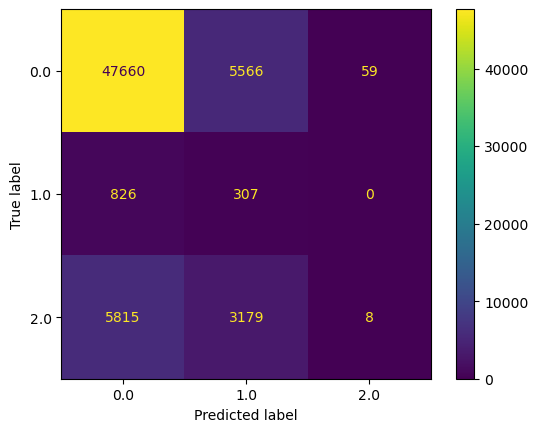

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')


# Logistic Regression!

In [47]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)
logreg

LogisticRegression()

In [48]:
logreg.score(X_test, y_test)

0.8386155786818038

In [49]:
# first example: a PhysicalActivity=1 ,Age=6, BMI=35
diabetes_prediction = logreg.predict([[1, 6, 65]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[2.]
Unfortunately you have or you will have Diabetes_2 with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [50]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[47660  5566    59]
 [  826   307     0]
 [ 5815  3179     8]]

[[[ 3494  6641]
  [ 5625 47660]]

 [[53542  8745]
  [  826   307]]

 [[54359    59]
  [ 8994     8]]]


In [51]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0., 1., 2.])

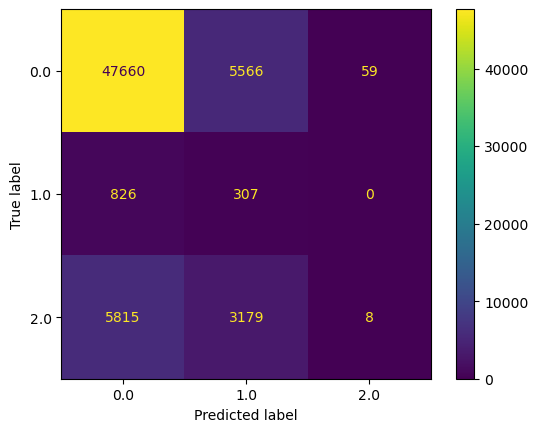

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     53285
         1.0       0.03      0.27      0.06      1133
         2.0       0.12      0.00      0.00      9002

    accuracy                           0.76     63420
   macro avg       0.34      0.39      0.32     63420
weighted avg       0.75      0.76      0.75     63420



In [54]:
from sklearn import metrics 

accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.7564648375906654

In [55]:
#precision = tp/(tp+fp)
precision = metrics.precision_score(y_test, y_pred, average = None)
precision

array([0.87770023, 0.03391516, 0.11940299])

In [56]:
#recall = tp/(tp+fn)
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([8.94435582e-01, 2.70962048e-01, 8.88691402e-04])

In [57]:
#recall(specificity) = tn/(tn+fp)
recall_specificity = metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred), average=None)
recall_specificity

array([0.34474593, 0.89443558])

In [58]:
#f1_score =  (recall * precision / (recall + precision) * 2)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.88598888, 0.06028473, 0.00176425])

In [59]:
list([{'Accuracy :' : accuracy, 'Precision :' : precision, 'Recall-Sensitivity :' : recall_sensitivity, 'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}])

[{'Accuracy :': 0.7564648375906654,
  'Precision :': array([0.87770023, 0.03391516, 0.11940299]),
  'Recall-Sensitivity :': array([8.94435582e-01, 2.70962048e-01, 8.88691402e-04]),
  'Recall-Specificity : ': array([0.34474593, 0.89443558]),
  'F1-Score : ': array([0.88598888, 0.06028473, 0.00176425])}]

# Decisison Tree Classifier !

In [60]:
X = df[['Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
y = df['Diabetes_012']


In [61]:
from sklearn import tree

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

desctree = tree.DecisionTreeClassifier().fit(X_train, y_train)
desctree

DecisionTreeClassifier()

In [62]:
desctree.score(X_test, y_test)

0.8383790602333648

In [63]:
# first example: a Smoker=1, PhysicalActivity=1 ,Age=6, BMI=65, Stroke=1, HeartDiseaseAttack=1
diabetes_prediction = desctree.predict([[1.0, 1.0, 6.0, 65.0, 1.0, 1.0]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[1.]
Unfortunately you have or you will have Pre-Diabetes with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [64]:
y_pred =  desctree.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [66]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[52485    22   778]
 [ 1089     1    43]
 [ 8303    15   684]]

[[[  743  9392]
  [  800 52485]]

 [[62250    37]
  [ 1132     1]]

 [[53597   821]
  [ 8318   684]]]


In [67]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

array([0., 1., 2.])

In [68]:
def plot(y_true, y_predictions):
    labels = unique_labels(y_test)
    column = [f'Predicted {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_predictions), columns = column, index = indices)
    
    return table

plot(y_test, y_pred)

,Predicted 0.0,Predicted 1.0,Predicted 2.0
Actual 0.0,52485,22,778
Actual 1.0,1089,1,43
Actual 2.0,8303,15,684


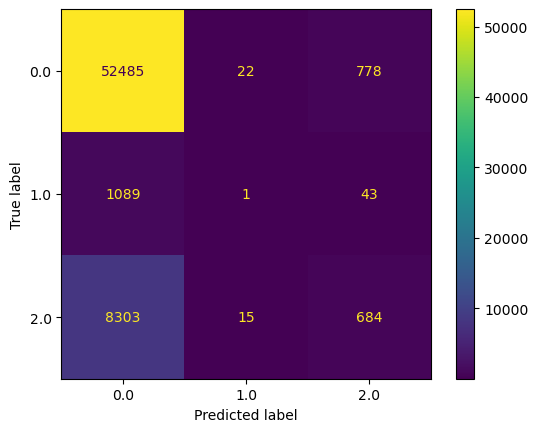

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91     53285
         1.0       0.03      0.00      0.00      1133
         2.0       0.45      0.08      0.13      9002

    accuracy                           0.84     63420
   macro avg       0.44      0.35      0.35     63420
weighted avg       0.78      0.84      0.78     63420



In [71]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.8383790602333648

In [72]:
#precision = tp/(tp+fp)
precision = metrics.precision_score(y_test, y_pred, average = None)
precision

array([0.84821501, 0.02631579, 0.45448505])

In [73]:
#recall = tp/(tp+fn)
recall_sensitivity = metrics.recall_score(y_test, y_pred, average=None)
recall_sensitivity

array([9.84986394e-01, 8.82612533e-04, 7.59831149e-02])

In [74]:
#recall(specificity) = tn/(tn+fp)
recall_specificity = metrics.recall_score(np.logical_not(y_test), np.logical_not(y_pred), average=None)
recall_specificity

array([0.07331031, 0.98498639])

In [75]:
#f1_score =  (recall * precision / (recall + precision) * 2)
F1_score = metrics.f1_score(y_test, y_pred, average=None)
F1_score

array([0.91149858, 0.00170794, 0.13019892])

In [76]:
list([{'Accuracy :' : accuracy, 'Precision :' : precision, 'Recall-Sensitivity :' : recall_sensitivity, 'Recall-Specificity : ' : recall_specificity, 
       'F1-Score : ' : F1_score}])

[{'Accuracy :': 0.8383790602333648,
  'Precision :': array([0.84821501, 0.02631579, 0.45448505]),
  'Recall-Sensitivity :': array([9.84986394e-01, 8.82612533e-04, 7.59831149e-02]),
  'Recall-Specificity : ': array([0.07331031, 0.98498639]),
  'F1-Score : ': array([0.91149858, 0.00170794, 0.13019892])}]

# Random Forest !

In [77]:
X = df[['Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']]
y = df['Diabetes_012']


In [78]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

randomfc = RandomForestClassifier(n_estimators=58)
randomfc.fit(X_train, y_train)
randomfc



RandomForestClassifier(n_estimators=58)

In [79]:
randomfc.score(X_test, y_test)

0.8387732576474298

In [80]:
# first example: a Smoker=1, PhysicalActivity=1 ,Age=6, BMI=65, Stroke=1, HeartDiseaseAttack=1
diabetes_prediction = randomfc.predict([[1.0, 1.0, 6.0, 65.0, 1.0, 1.0]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[2.]
Unfortunately you have or you will have Diabetes_2 with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [81]:
y_pred =  randomfc.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
np.array(y_test)[:10]

array([0., 0., 0., 0., 2., 0., 0., 0., 2., 0.])

In [83]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[52391    16   878]
 [ 1070     3    60]
 [ 8188    13   801]]

[[[  877  9258]
  [  894 52391]]

 [[62258    29]
  [ 1130     3]]

 [[53480   938]
  [ 8201   801]]]


# Extra Tree Classifer !

In [84]:
extratree = ExtraTreesClassifier()

In [85]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [86]:
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [87]:
extratree.score(X_test, y_test)

0.8387574897508673

In [88]:
# first example: a Smoker=1, PhysicalActivity=1 ,Age=6, BMI=65, Stroke=1, HeartDiseaseAttack=1
diabetes_prediction = extratree.predict([[1.0, 1.0, 6.0, 65.0, 1.0, 1.0]])
print(diabetes_prediction)

if diabetes_prediction == [0.0] :
    print(f'Fortunately you have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Go on living this way !')
else:
    print(f'Unfortunately you have or you will have {lookup_diabetes_012[diabetes_prediction[0]]} with your lifestyle ! Please contact a physician for more information !')

[2.]
Unfortunately you have or you will have Diabetes_2 with your lifestyle ! Please contact a physician for more information !


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(


In [89]:
columns = ['Smoker', 'PhysActivity', 'Age', 'BMI', 'Stroke', 'HeartDiseaseorAttack']
imp = pd.Series(extratree.feature_importances_, index= columns)
imp

Smoker                  0.011902
PhysActivity            0.062368
Age                     0.223676
BMI                     0.521493
Stroke                  0.034959
HeartDiseaseorAttack    0.145602
dtype: float64

<AxesSubplot:>

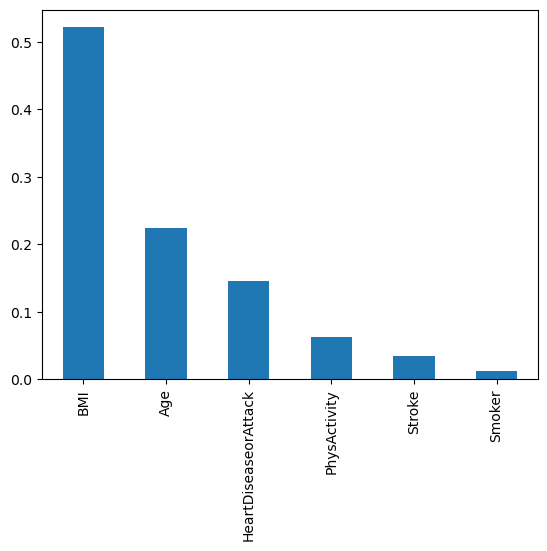

In [90]:
imp.nlargest(6).plot(kind = 'bar')

In [91]:
y_pred =  extratree.predict(X_test)
y_pred[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [92]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
print(cm)
print()
mcm = multilabel_confusion_matrix(y_test, y_pred)
print(mcm)

[[52498    20   767]
 [ 1086     1    46]
 [ 8295    12   695]]

[[[  754  9381]
  [  787 52498]]

 [[62255    32]
  [ 1132     1]]

 [[53605   813]
  [ 8307   695]]]


In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     53285
         1.0       0.03      0.00      0.00      1133
         2.0       0.46      0.08      0.13      9002

    accuracy                           0.84     63420
   macro avg       0.45      0.35      0.35     63420
weighted avg       0.78      0.84      0.78     63420



# Stratified K-Fold cross-validation

In [94]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)
skf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [95]:
from sklearn.model_selection import cross_val_score

knn = print(f'knncrv: {cross_val_score(KNeighborsClassifier(n_neighbors = 5), X, y)}')


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

knncrv: [0.83102728 0.81486518 0.82081757 0.82125118 0.82192132]


In [96]:
linreg = print(f'linregcrv: {cross_val_score(LinearRegression(), X, y)}')


linregcrv: [0.11205901 0.0812517  0.11746259 0.11658146 0.1188666 ]


In [97]:
logreg = print(f'logregcrv: {cross_val_score(LogisticRegression(), X, y)}')

C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

logregcrv: [0.84320798 0.83577736 0.84228161 0.84263639 0.84322769]


C:\Users\Ellen\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
desctc= print(f'desctccrv: {cross_val_score(tree.DecisionTreeClassifier(), X, y)}')


desctccrv: [0.8404486  0.83871413 0.84092163 0.84092163 0.84036976]


In [99]:
randomfc= print(f'randomfccrv: {cross_val_score(RandomForestClassifier(n_estimators=58), X, y)}')


randomfccrv: [0.84029092 0.83851703 0.84060628 0.8404486  0.84054715]


In [100]:
extratc= print(f'extratreecrv: {cross_val_score(ExtraTreesClassifier(), X, y)}')


extratreecrv: [0.8406457  0.8390492  0.84102018 0.84113844 0.84054715]


# ROC AUC Score !

In [101]:
from sklearn.metrics import roc_curve, auc

In [150]:
# default is 75% / 25% train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
scaler.fit(X_test)
X_test = scaler.transform(X_test)


In [152]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn = knn.fit(X_train, y_train)

In [153]:
# Logistic Regression
logreg = LogisticRegression().fit(X_train, y_train)
#y_pred_logreg = logreg.decision_function(X_test)

In [155]:
# Desicion Tree
desctree = tree.DecisionTreeClassifier().fit(X_train, y_train)

In [156]:
# Random Forest
randomfc = RandomForestClassifier(n_estimators=58)
randomfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=58)

In [157]:
# Extra Tree
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [158]:
from sklearn.metrics import roc_curve, auc 
#from sklearn.preprocessing import label_binarize

In [172]:
# Plot ROC Curve for each Classifier

def plot_roc(X_test, y_test, classifiers):
    
    for name,classifier in classifiers.items():
        if hasattr(classifier, "decision_function"):
            probs = classifier.decision_function(X_test)
        elif hasattr(classifier, 'predict_proba'):
            probs = classifier.predict_proba(X_test) [:,1]
        fpr, tpr, threshold = roc_curve(y_test, probs)
        roc_auc = auc(fpr, tpr)
        print('ROC AUC = %0.2f'%roc_auc)
        plt.plot(fpr, tpr, label = '%s (AUC = %0.2f)'%(name, roc_auc))
    
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'b--')
    plt.xlim([0,1])
    plt.ylim(0,1.05)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [173]:
classifiers={'knn': knn, 'logreg': logreg, 'desctree': desctree, 'randomfc': randomfc, 'extratree': extratree }
#fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=range(nclasses))[:,i], y_score[:,i])
plot_roc(X_test, y_test, classifiers)

ValueError: multiclass format is not supported